# HW5 BioE231

In [67]:
YES1 = 'GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'
NOT1 = 'GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC'
AND1 = 'GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU'
OR1 = 'GGGCGACCCCUGAUGGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'

seqs = {'YES1':YES1, 'NOT1':NOT1, 'AND1': AND1, 'OR1':OR1}

| riboswitch  name 	| OBS-1  start 	| OBS-1 end 	| OBS-2 start 	| OBS-2 end 	| Red1 start 	| Red1 end 	| Red2 start 	| Red2 end 	|
|------------------	|--------------	|-----------	|-------------	|-----------	|------------	|----------	|------------	|----------	|
| YES-1            	| 26           	| 47        	| N/A         	| N/A       	| 16         	| 21       	| 49         	| 54       	|
| NOT-1            	| 44           	| 66        	| N/A         	| N/A       	| 40         	| 43       	| 74         	| 77       	|
| AND-1            	| 30           	| 45        	| 49          	| 64        	| 16         	| 23       	| 70         	| 77       	|
| OR-1             	| 27           	| 46        	| 47          	| 66        	| 16         	| 26       	| 67         	| 77       	|


In [68]:
# The following graphs are generated using the default parameters in the RNAfold
import subprocess
for (name,seq) in seqs.items():
    p = subprocess.run(['RNAfold'],
                        input = bytes(seq,'ascii'),
                        stdout=subprocess.PIPE, 
                        stderr=subprocess.PIPE, check=True)
    print(name)
    print(p.stdout.decode())
   


NOT1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)

OR1
GGGCGACCCCUGAUGGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))..))))))....(((((....))))).)))))))) (-37.90)

YES1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)

AND1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-42.10)



# Under default parameters:
## YES1
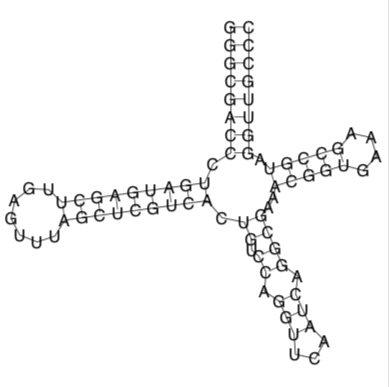 
## NOT1
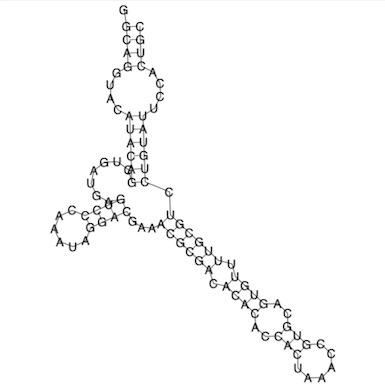
## AND1
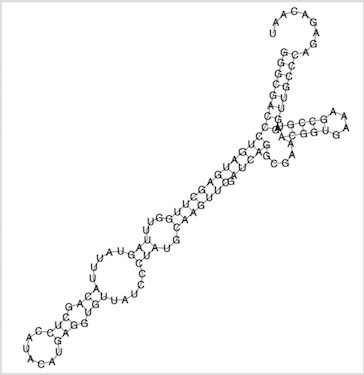
## OR1!
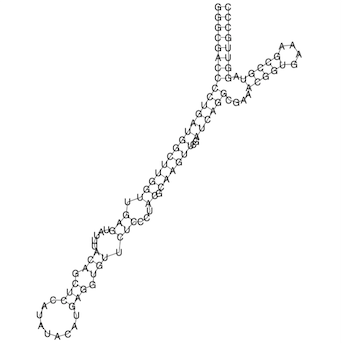

From the inserted graphs above, we can see that the structures of the RNA do not match to those on the paper using the default parameters in RNAfold. In the paper, the author mentions that the algorithm used to construct the RNA structures is a function of temperature. In this case, the unmatched structures could be due to the use of default temperature 37°C.

In [62]:
# the default temperature is 37°C, through trials and errors it was found that 
# at 5°C, the produced structure matches to that in the paper

import subprocess
for (name,seq) in seqs.items():
    p = subprocess.run(['RNAfold','--temp=5'],
                        input = bytes(seq,'ascii'),
                        stdout=subprocess.PIPE, 
                        stderr=subprocess.PIPE, check=True)
    print(name)
    print(p.stdout.decode())


NOT1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....(((((((....).((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-51.78)

OR1
GGGCGACCCCUGAUGGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(.(.....(((.(((.......))).)))...).).)).))))))..))))))....(((((....))))).)))))))) (-63.57)

YES1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((.(..(((.......))).)))))))).))))).....(((((....))))).)))))))) (-53.19)

AND1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-70.09)



# At Temp = 5 °C:
## YES1
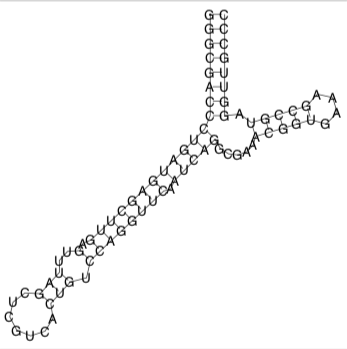
## NOT1
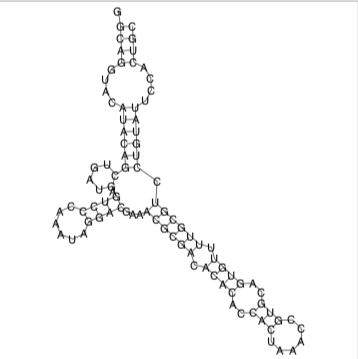
## AND1
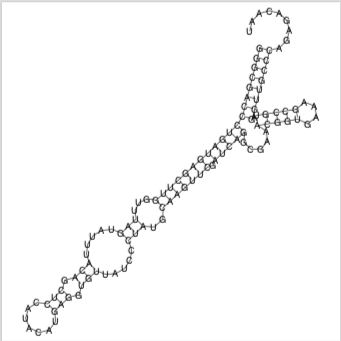
## OR1
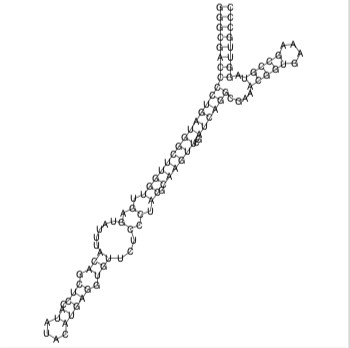


In [66]:
BPpositions = {'YES1':[(26,47),(None,None),(16,21),(49,54)],
               'NOT1':[(44,66),(None,None),(40,43),(74,77)],
               'AND1':[(30,45),(49,64),(16,23),(70,77)],
               'OR1': [(27,46),(47,66),(16,26),(67,77)]}

# Use a dot (“.”) for every unconstrained base, and a lower-case x for every base that you want to prevent from
# pairing. That is to say, put an x at every base spanning the blue OBS region.

def make_constraints(name,OBSNUM):
    seq = seqs[name]
    position = 1
    constraint = ''
    OBS1_start = BPpositions[name][0][0]
    OBS1_end = BPpositions[name][0][1]
    OBS2_start = BPpositions[name][1][0]
    OBS2_end = BPpositions[name][1][1]
    OBS = seq[OBS1_start:OBS1_end + 1]

    for base in seq:  
        if OBSNUM == 1:
            if position>=OBS1_start and position<=OBS1_end:
                c = 'x'
                constraint += c
                position += 1
            else:
                c = '.'
                constraint += c
                position += 1
        elif OBSNUM == 2:
            if position>=OBS2_start and position<=OBS2_end:
                c = 'x'
                constraint += c
                position += 1
            else:
                c = '.'
                constraint += c
                position += 1
        else:
            if (position>=OBS1_start and position<=OBS1_end) or (position>=OBS2_start and position<=OBS2_end):
                c = 'x'
                constraint += c
                position += 1
            else:
                c = '.'
                constraint += c
                position += 1
        
    return(constraint)

print('YES1 OBS1')
print(make_constraints('YES1',1))
print('NOT1 OBS1')
print(make_constraints('NOT1',1))

print('OR1 OBS1')
print(make_constraints('OR1',1))
print('OR1 OBS2')
print(make_constraints('OR1',2))
print('OR1 BOTH OBS')
print(make_constraints('OR1',3))

print('AND1 OBS1')
print(make_constraints('AND1',1))
print('AND1 OBS2')
print(AND1)
print(make_constraints('AND1',2))
print('AND1 BOTH OBS')
print(make_constraints('AND1',3))
print()
print('The above constraints for YES1, NOT1, AND1, and OR1 are then stored as txt files')

YES1 OBS1
.........................xxxxxxxxxxxxxxxxxxxxxx.................................
NOT1 OBS1
...........................................xxxxxxxxxxxxxxxxxxxxxxx..........................
OR1 OBS1
..........................xxxxxxxxxxxxxxxxxxxx.........................................................
OR1 OBS2
..............................................xxxxxxxxxxxxxxxxxxxx.....................................
OR1 BOTH OBS
..........................xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx.....................................
AND1 OBS1
.............................xxxxxxxxxxxxxxxx...................................................................
AND1 OBS2
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
................................................xxxxxxxxxxxxxxxx................................................
AND1 BOTH OBS
.............................xxxxxxxxxxxxxxxx...xxxxxxxxxxxxxxxx..........................

## OBS unbound & bound YES1 
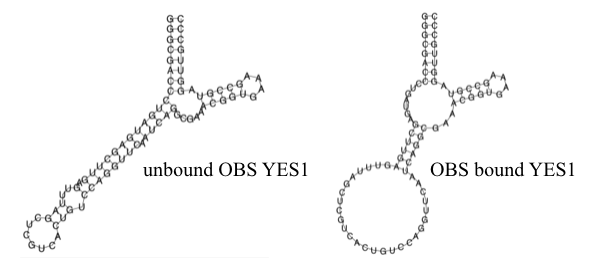
## OBS unbound & bound NOT
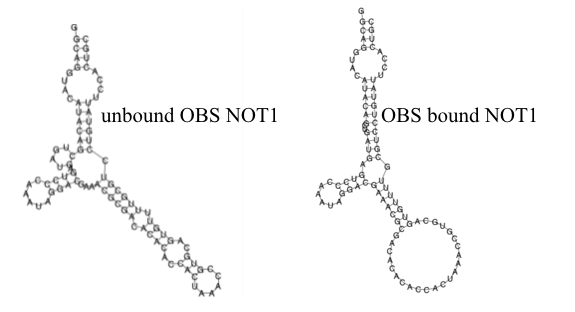

In [64]:
def structure_under_constraints(txt):
    f = open(txt,'r')
    constraints = f.read()
    p = subprocess.run(['RNAfold', '--constraint'],
                        input = bytes(constraints,'ascii'),
                        stdout=subprocess.PIPE, 
                        stderr=subprocess.PIPE, check=True)
    return(p.stdout.decode())
print('YES1')
print(structure_under_constraints('YES-1_constraints.txt'))

print('NOT1')
print(structure_under_constraints('NOT-1_constraints.txt'))

YES1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((...........................))))))...(((((....))))).)))))))) (-24.50)

NOT1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((..((((.((((......))))(((((((.......................))))))).))))))))))....)))) (-20.80)



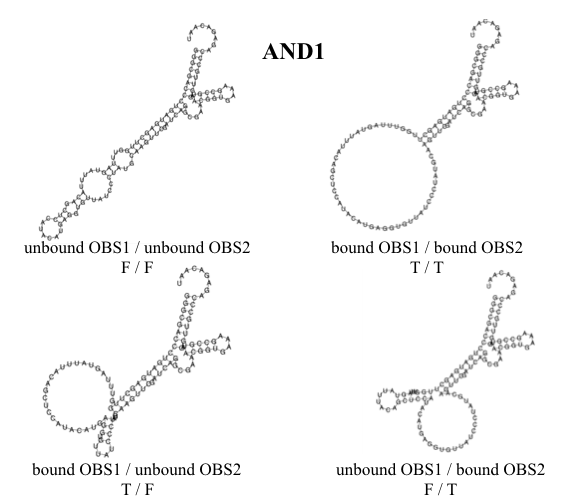
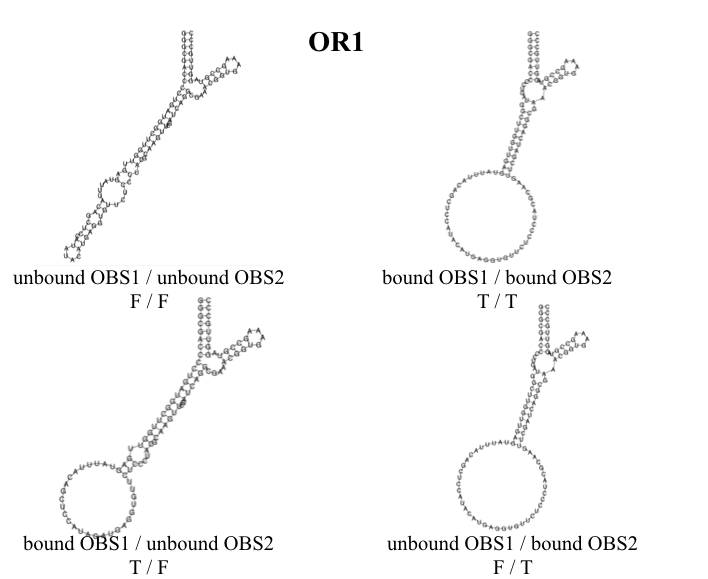